# INF502 - Project

<h3>Abdurrahman ODABAŞI, Baraa ALSALEH, Muhammed ŞİHEBİ</h3>

<h3>Problem Description:</h3>

<p>A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target</p>

<h4>Note:</h4>
<li>The dataset is imbalanced.</li>
<li>Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.</li>
<li>Missing imputation can be a part of your pipeline as well.</li>

<h4>Features:</h4>
<li>enrollee_id : Unique ID for candidate</li>
<li>city: City code</li>
<li>city_ development _index : Developement index of the city (scaled)</li>
<li>gender: Gender of candidate</li>
<li>relevent_experience: Relevant experience of candidate</li>
<li>enrolled_university: Type of University course enrolled if any</li>
<li>education_level: Education level of candidate</li>
<li>major_discipline :Education major discipline of candidate</li>
<li>experience: Candidate total experience in years</li>
<li>company_size: No of employees in current employer's company</li>
<li>company_type : Type of current employer</li>
<li>lastnewjob: Difference in years between previous job and current job</li>
<li>training_hours: training hours completed</li>
<li>target: 0 – Not looking for job change, 1 – Looking for a job change</li>

<a href="https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists">Link to the dataset in Kaggel.com</a>



# Imports

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from pandas.plotting import scatter_matrix 

# Libraries for supervised learning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, normalize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, precision_score, recall_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier 
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from scipy.stats import randint
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.calibration import CalibratedClassifierCV


# Libraries for unsupervised learning
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import BayesianGaussianMixture
import pickle

# Get the data 

In [ ]:
train_csv_path = 'https://raw.githubusercontent.com/abodaotabashi/HRAnalytics/master/aug_train.csv'
df = pd.read_csv(train_csv_path, sep = ',', decimal = '.')

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


* enrollee_id : Unique ID for candidate 
* city: City code 
* city_ development _index : Developement index of the city (scaled) 
* gender: Gender of candidate 
* relevent_experience: Relevant experience of candidate 
* enrolled_university: Type of University course enrolled if any 
* education_level: Education level of candidate 
* major_discipline :Education major discipline of candidate 
* experience: Candidate total experience in years 
* company_size: No of employees in current employer's company 
* company_type : Type of current employer 
* lastnewjob: Difference in years between previous job and current job 
* training_hours: training hours completed 
* target: 0 – Not looking for job change, 1 – Looking for a job change

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df.nunique(dropna=True)

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
test_csv_path = 'https://raw.githubusercontent.com/abodaotabashi/HRAnalytics/master/aug_test.csv'
x_test = pd.read_csv(test_csv_path, sep = ',', decimal = '.').drop(["enrollee_id"], axis=1)
test_target_csv_path = 'https://raw.githubusercontent.com/abodaotabashi/HRAnalytics/master/aug_test_target.csv'
y_test = pd.read_csv(test_target_csv_path, sep = ',', decimal = '.').to_numpy()

## Accuracy Paradox

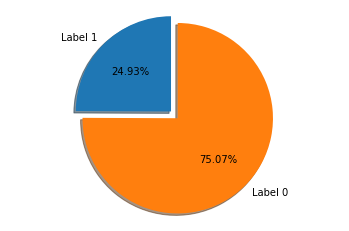

In [ ]:
positive_count = df[df.target == 1].shape[0]
negative_count = df[df.target == 0].shape[0]

labels = 'Label 1', 'Label 0'
sizes = [positive_count, negative_count]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.savefig('paradox.png')
plt.show()

# Discover and Visualize the Data to Gain Insights

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix["target"].sort_values(ascending=False)

target                    1.000000
enrollee_id               0.049475
training_hours           -0.021577
city_development_index   -0.341665
Name: target, dtype: float64

## Numeric Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F6D4264F0>,
      dtype=object)

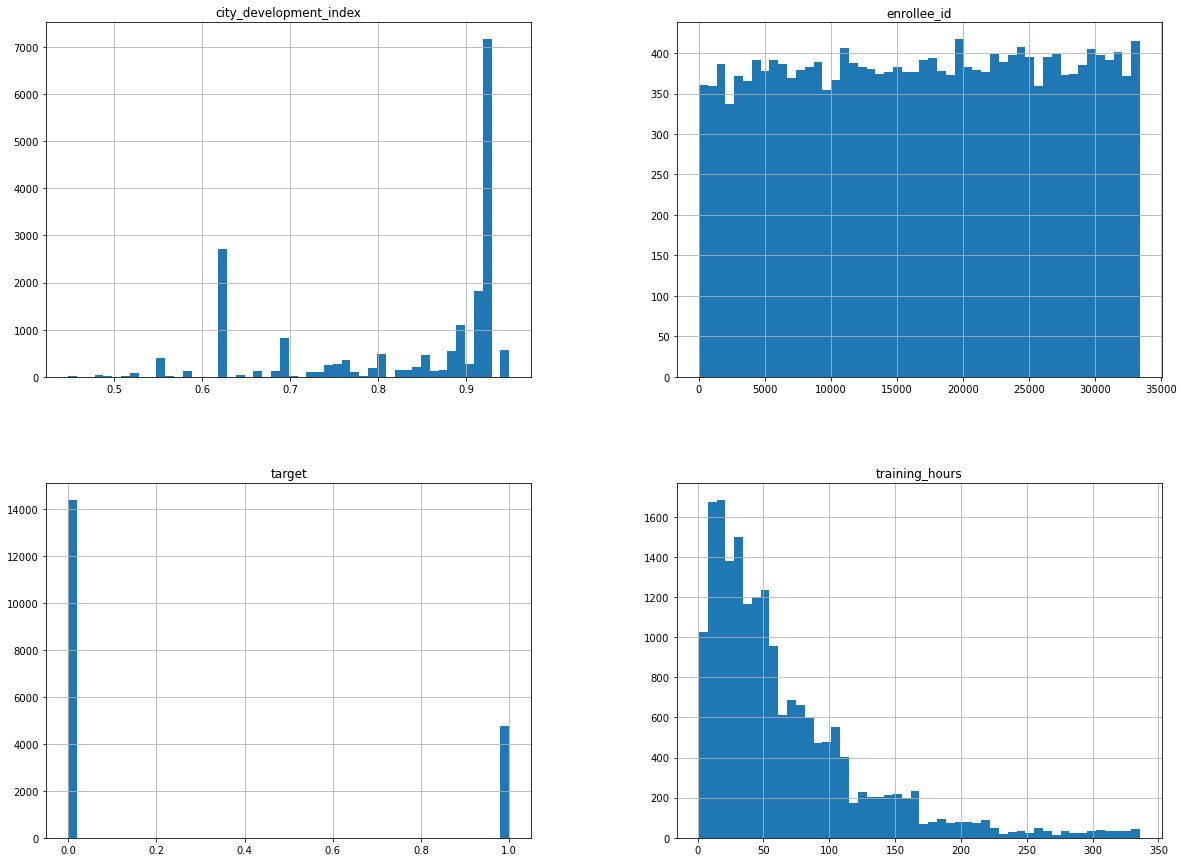

In [ ]:
df.hist(bins=50, figsize=(20,15))

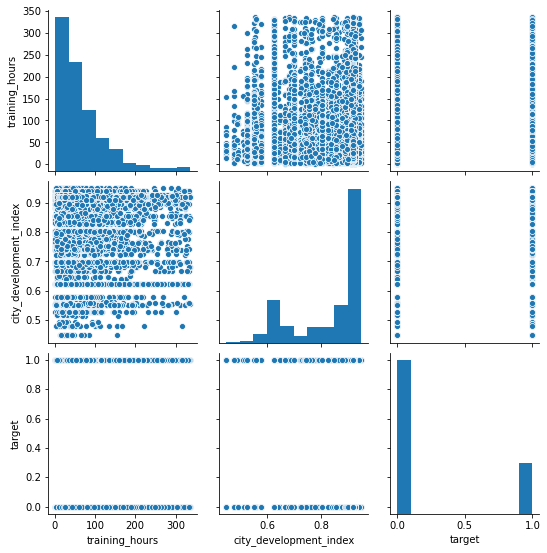

In [ ]:
sns.pairplot(df[["training_hours", "city_development_index", "target"]])

### city_development_index 

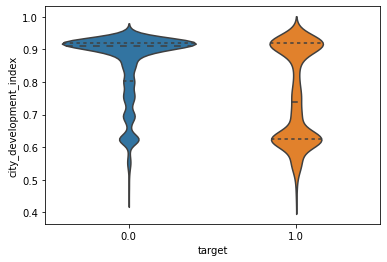

In [ ]:
vp_city_development_index = sns.violinplot(x='target', y ='city_development_index', data=df, inner="quartile")

### training_hours

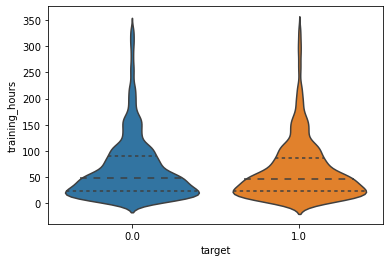

In [ ]:
vp_city_development_index = sns.violinplot(x='target', y ='training_hours', data=df, inner="quartile")

## Non-Numeric Data


### Gender

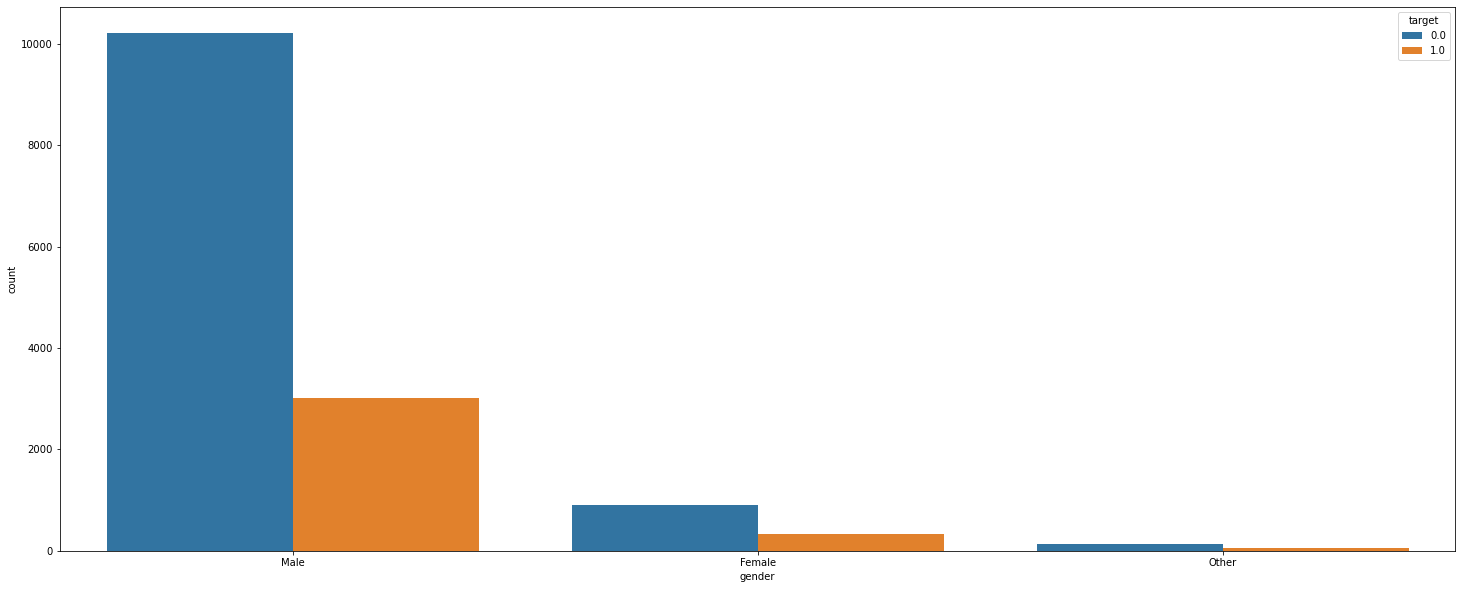

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["gender"],hue=df["target"])

### relevent_experience

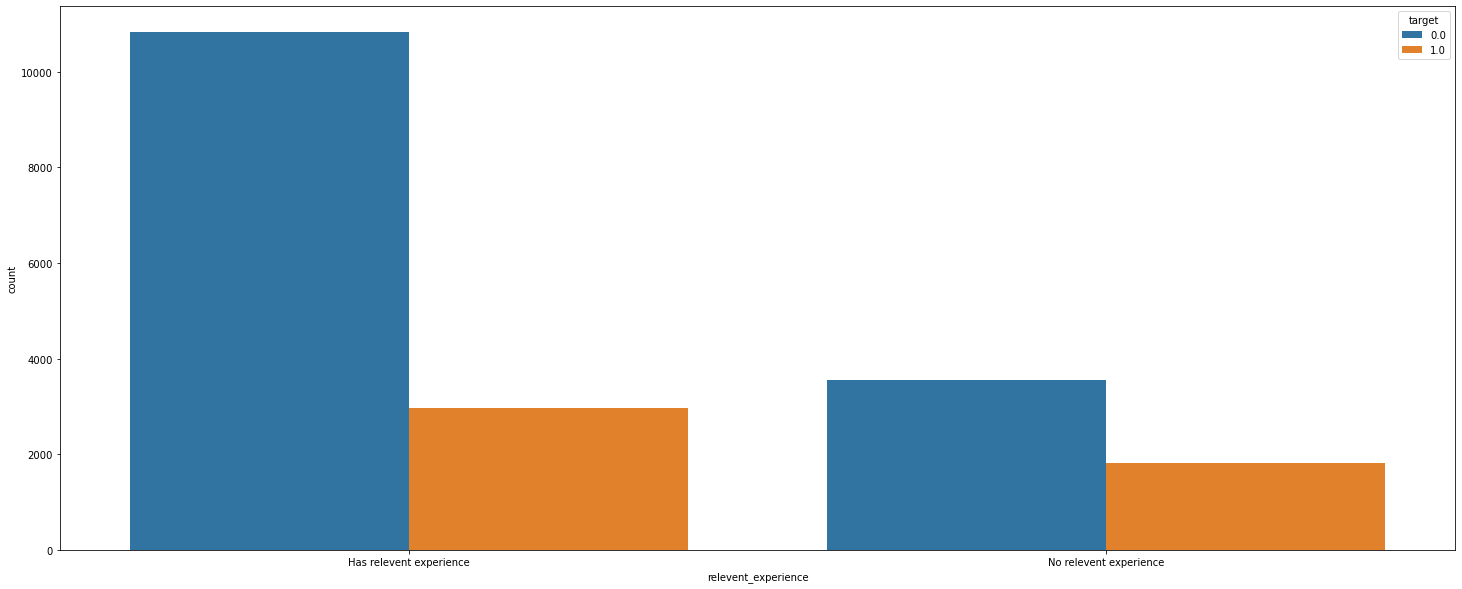

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["relevent_experience"],hue=df["target"])

### enrolled_university

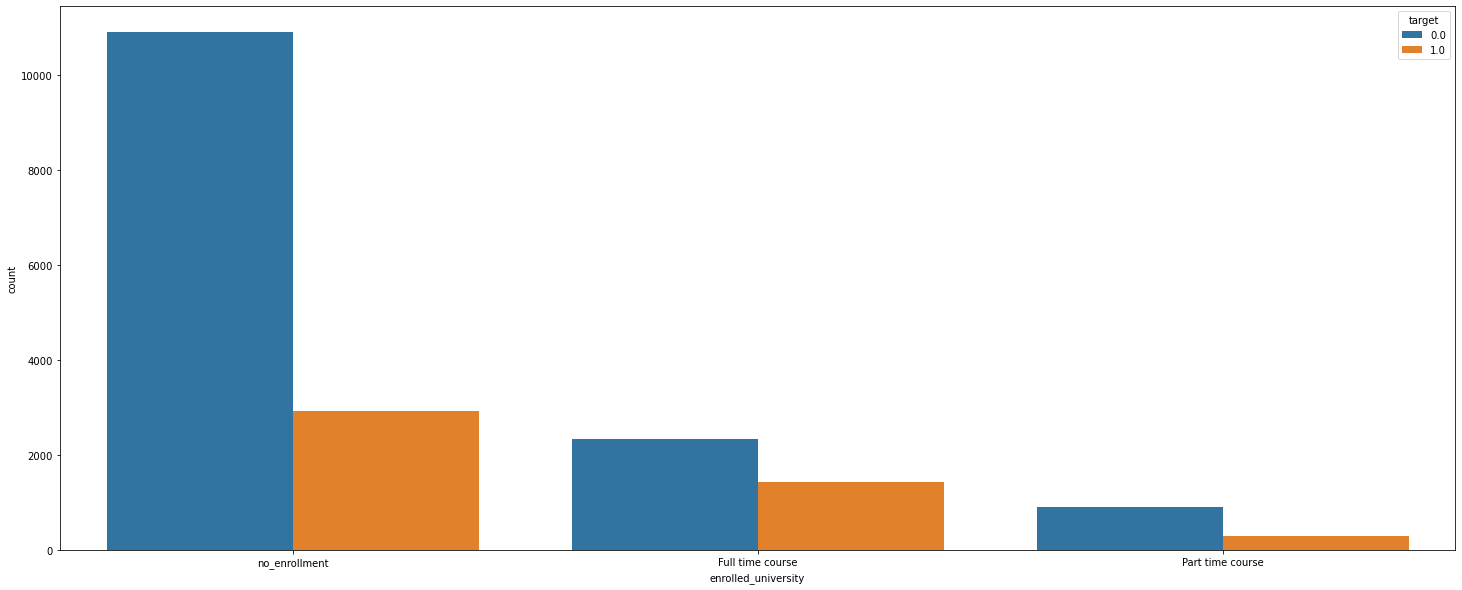

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["enrolled_university"],hue=df["target"])

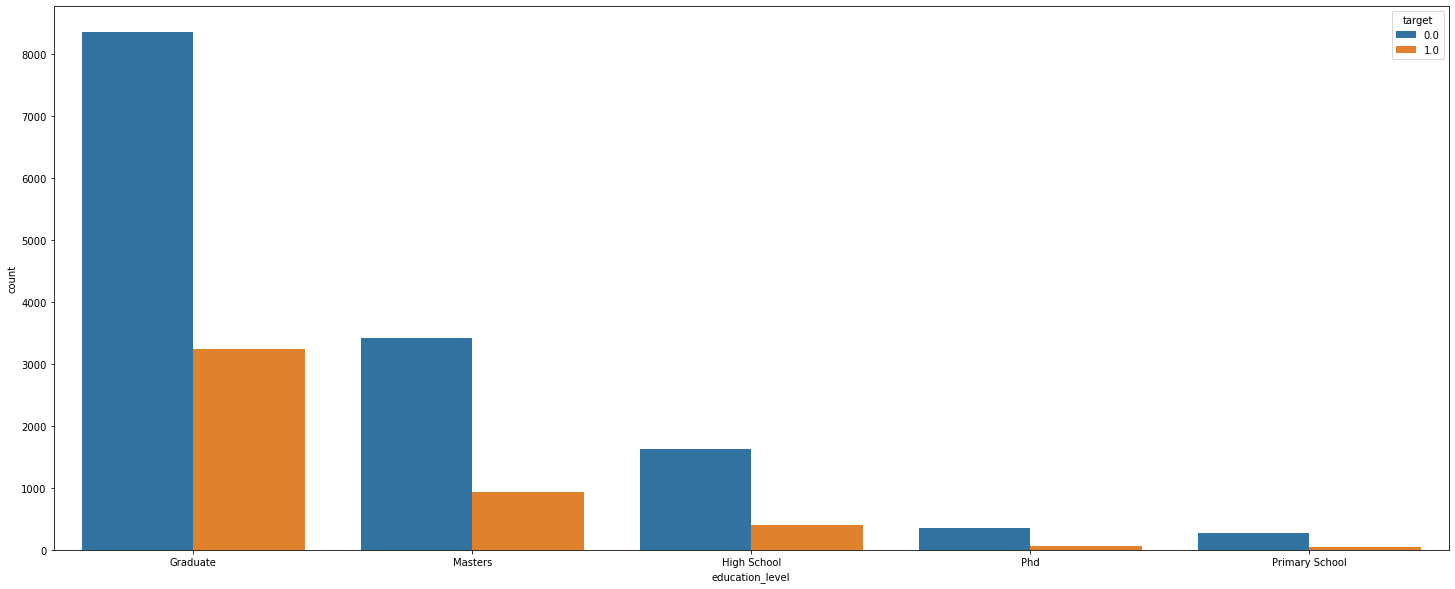

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["education_level"],hue=df["target"])

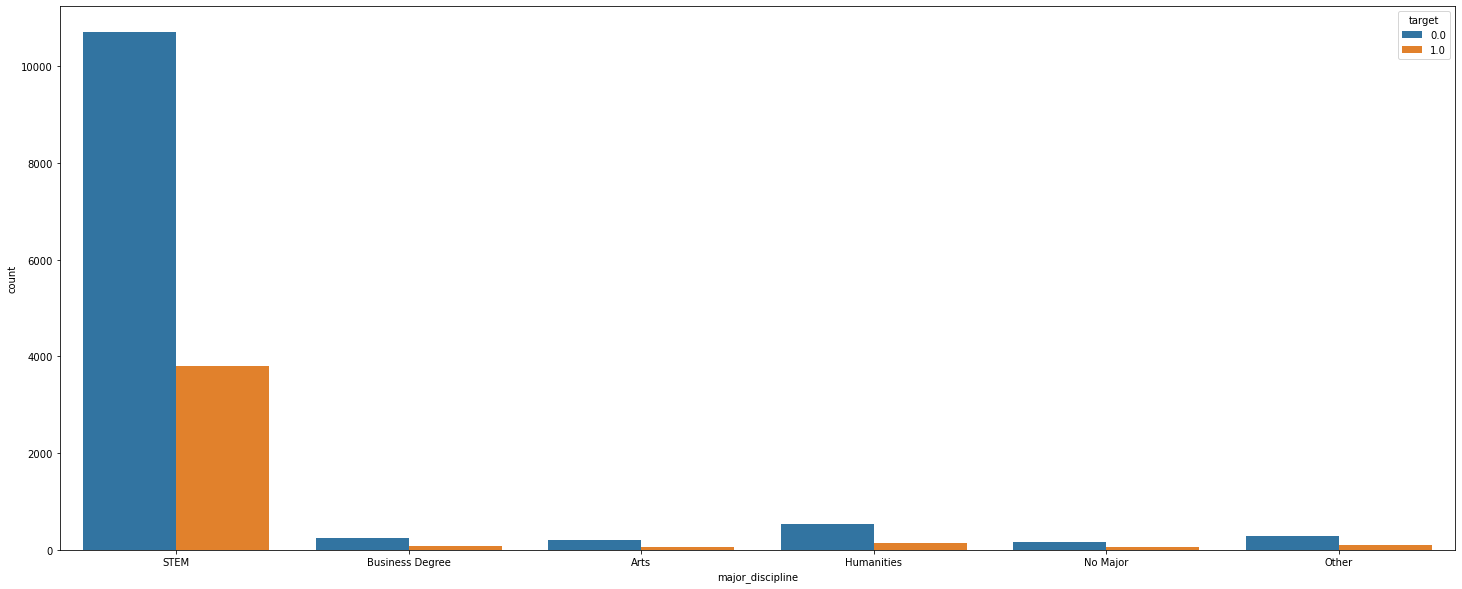

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["major_discipline"],hue=df["target"])

### education_level

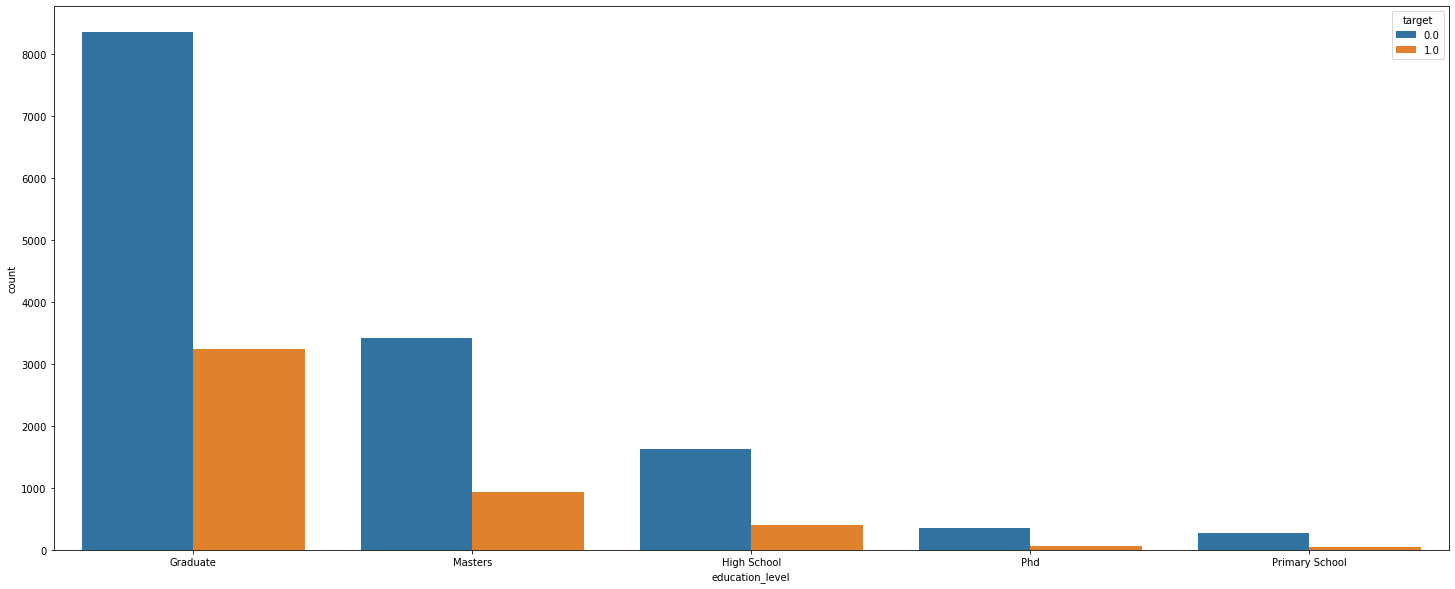

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["education_level"],hue=df["target"])

### major_discipline

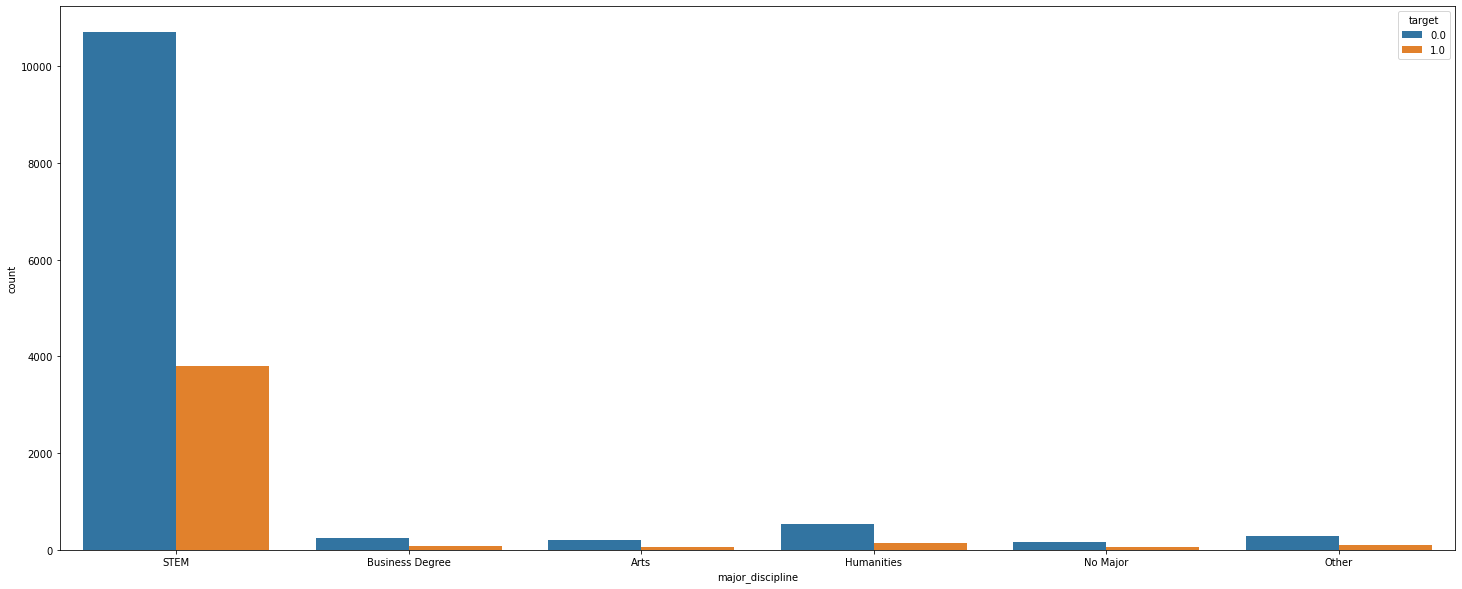

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["major_discipline"],hue=df["target"])

### experience

In [ ]:
def expToNum(my_df): 
    for i, e in enumerate(my_df["experience"]): 
        e = str(e)
        if e[0] == '>': 
            my_df["experience"][i] = 21
        elif e[0] == '<': 
            my_df["experience"][i] = 0
        else:
            my_df["experience"][i] = float(e)
    return my_df

<ipython-input-22-f93126bc3fb1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df["experience"][i] = 21
<ipython-input-22-f93126bc3fb1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df["experience"][i] = float(e)
<ipython-input-22-f93126bc3fb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df["experience"][i] = 0


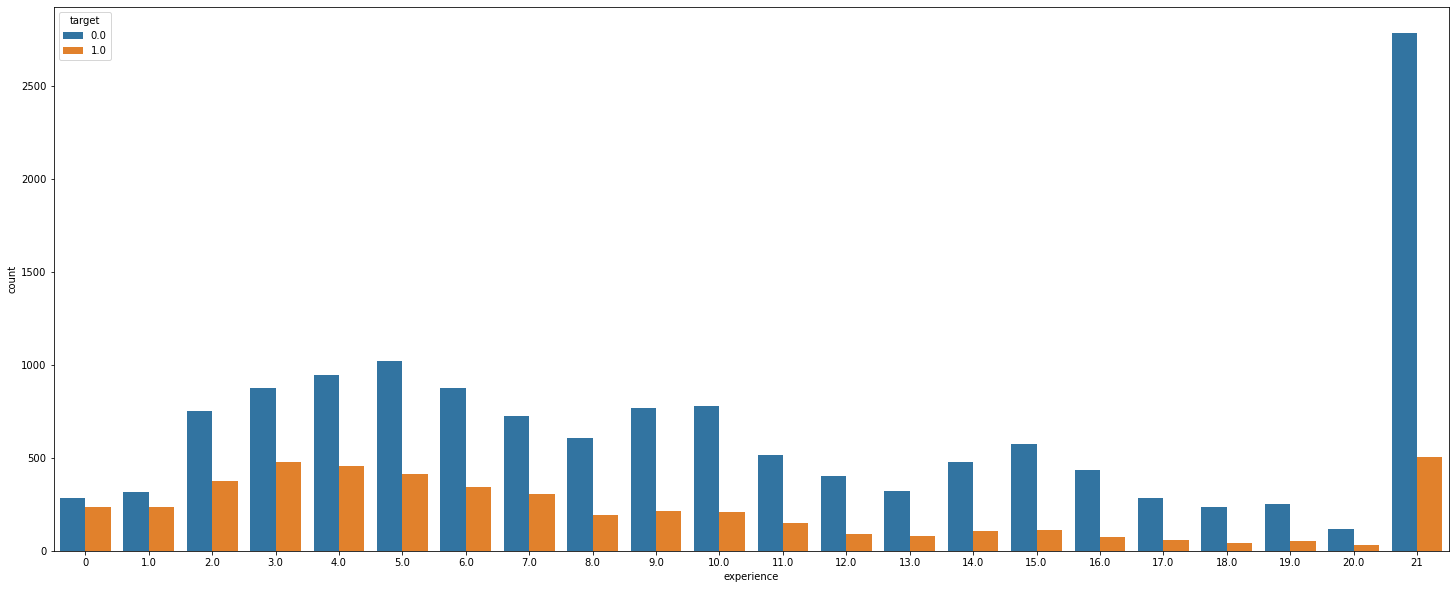

In [ ]:
plt.figure(figsize=(25,10))
df2 = df.copy()
df2 = expToNum(df2)
sns.countplot(df2["experience"],hue=df["target"])

### company_size

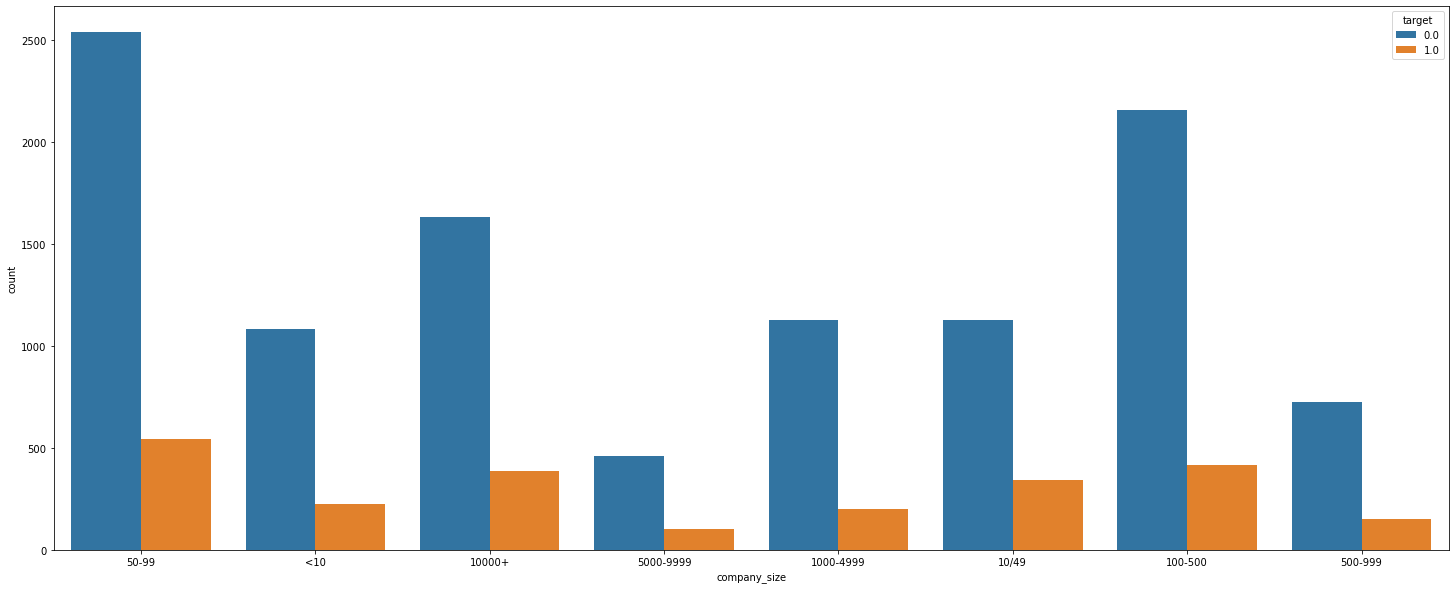

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["company_size"],hue=df["target"])

### company_type

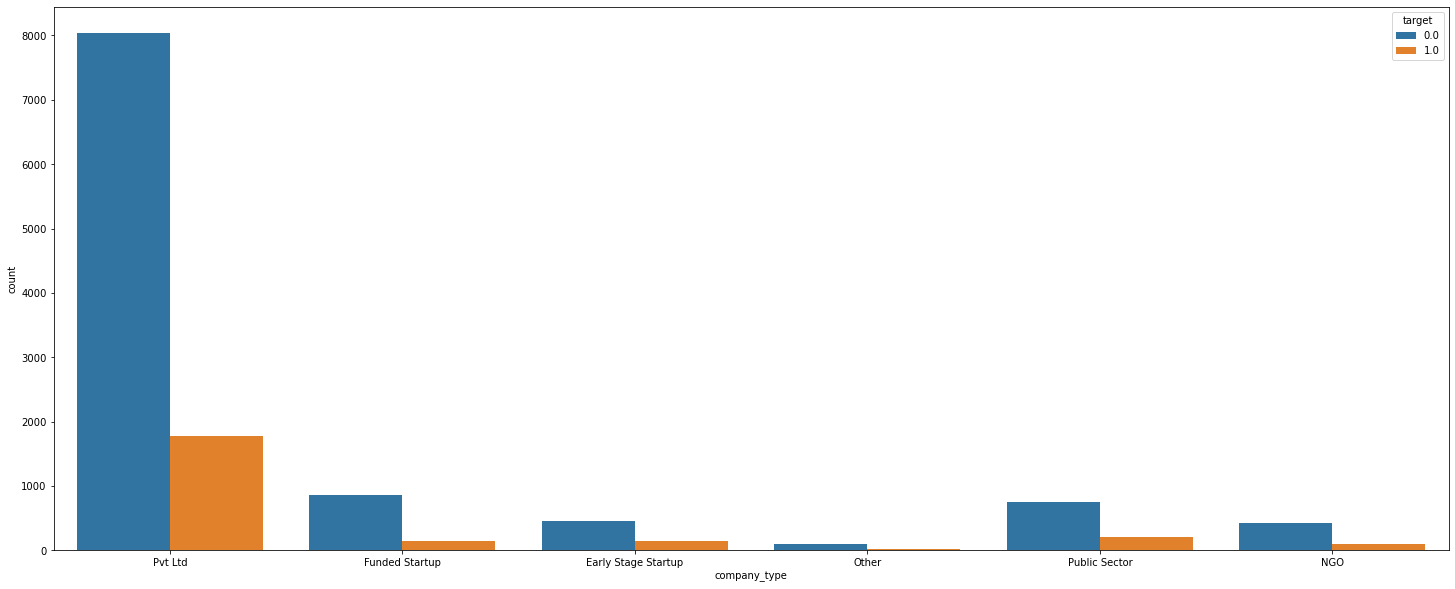

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["company_type"],hue=df["target"])

### last_new_job

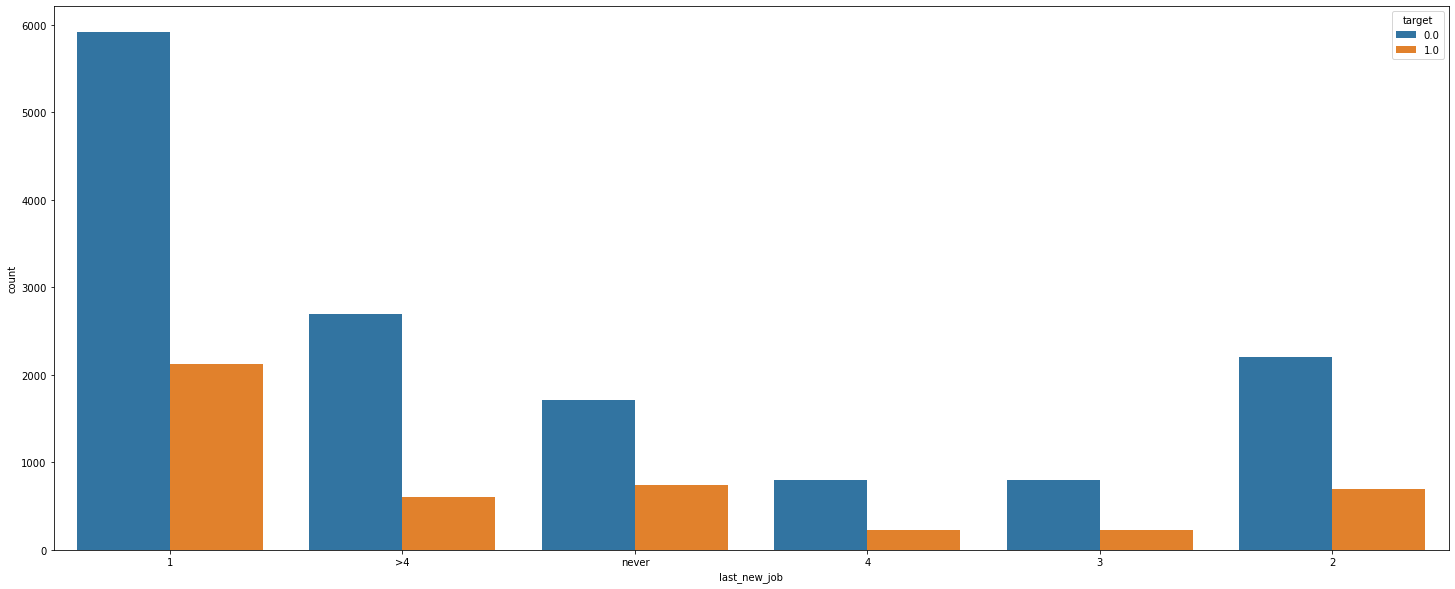

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df["last_new_job"],hue=df["target"])

# Prepare the Data for Machine Learning Algorithms

In [ ]:
x_train = df.drop(["target", "enrollee_id"], axis=1)
y_train = df["target"].copy()

## Pipelines

### Categorical Data

In [ ]:
# city
city_encoder = OneHotEncoder()

In [ ]:
# gender 
gender_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("cat", OneHotEncoder())
])

In [ ]:
# relevent_experience
relevent_experience_encoder = Pipeline([
    ('cat', OrdinalEncoder(categories=[["No relevent experience", "Has relevent experience"]])),
    ('std_scaler', StandardScaler())      
])

In [ ]:
# enrolled_university
enrolled_university_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ("cat", OrdinalEncoder(categories=[["no_enrollment", "Part time course", "Full time course"]])),
    ('std_scaler', StandardScaler())
])

In [ ]:
# education_level
education_level_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ("cat", OrdinalEncoder(categories=[["Primary School", "High School", "Graduate", "Masters", "Phd"]])),
    ('std_scaler', StandardScaler())
])

In [ ]:
# major_discipline
major_discipline_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ("cat", OneHotEncoder())
])

In [ ]:
# experience 
experience_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ("cat", OrdinalEncoder(categories=[['<1', '1' ,'2' ,'3' ,'4' ,'5' ,'6' ,'7' ,'8' ,'9' ,'10','11','12','13','14','15','16','17','18','19','20','>20']])),
    ('std_scaler', StandardScaler()) 
]) 

In [ ]:
# company_size 
company_size_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ("cat", OrdinalEncoder(categories=[['<10','10/49','50-99','100-500', '500-999', '1000-4999','5000-9999','10000+']])), 
    ('std_scaler', StandardScaler())
]) 

In [ ]:
# company_type 
company_type_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ("cat", OneHotEncoder())
])

In [ ]:
# last_new_job
last_new_job_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ("cat", OrdinalEncoder(categories=[['never', '1', '2', '3', '4', '>4']])),
    ('std_scaler', StandardScaler()) 
]) 

### Numeric data

In [ ]:
# city_development_index
# pass no transformation needed 

In [ ]:
# training_hours
training_hours_encoder = StandardScaler()

## Predictors for missing data

### gender Prediction

In [ ]:
# the training data is the data with no gender with nan values 
x_train_gender = df[df['gender'].notnull()].drop(["gender", "enrollee_id"], axis=1)
y_train_gender = df[df['gender'].notnull()]["gender"]

In [ ]:
gender_pipeline = ColumnTransformer([
    ("relevent_experience", relevent_experience_encoder, ["relevent_experience"]),
    ("enrolled_university", enrolled_university_encoder, ["enrolled_university"]),
    ("education_level", education_level_encoder, ["education_level"]),
    ("major_discipline", major_discipline_encoder, ["major_discipline"]),
    ("experience", experience_encoder, ["experience"]),
    ("company_size", company_size_encoder, ["company_size"]),
    ("company_type", company_type_encoder, ["company_type"]),
    ("last_new_job", last_new_job_encoder, ["last_new_job"]),
    ("training_hours", training_hours_encoder, ["training_hours"]), 
    ("city", city_encoder, ["city"]), 
    ('city_development_index', 'passthrough', ["city_development_index"]), 
    ("target", 'passthrough', ["target"])
])

In [ ]:
x_train_gender_prepared = gender_pipeline.fit_transform(x_train_gender)

In [ ]:
rf_clf_gender = RandomForestClassifier(random_state=42, n_jobs=8)
rf_clf_gender.fit(x_train_gender_prepared, y_train_gender)

y_train_gender_predicted = rf_clf_gender.predict(x_train_gender_prepared)
accuracy_score(y_train_gender, y_train_gender_predicted)

0.9992491467576792

In [ ]:
cross_val_score(rf_clf_gender, x_train_gender_prepared, y_train_gender, cv=3, scoring="accuracy")

array([0.89578215, 0.89555601, 0.89698956])

This is quite good. It is at least better than the most_frequent imputation method. We can use this to predict the gender instead of using the most_frequent method. 

In [ ]:
# replace the nan genders with the predicted genders in the original train data 
x_test_gender = df[df['gender'].isnull()].drop(["enrollee_id", "gender"], axis=1)
x_test_gender = x_test_gender.replace("city_171", "city_103")
x_test_gender_prepared = gender_pipeline.transform(x_test_gender)
x_test_gender_predicted = rf_clf_gender.predict(x_test_gender_prepared)
x_train.loc[(x_train["gender"].isnull()),'gender'] = x_test_gender_predicted

In [ ]:
# replace the nan genders with the predicted genders in the original test data 
o_x_test_gender = x_test.copy()
o_x_test_gender['target'] = y_test
o_x_test_gender = o_x_test_gender[o_x_test_gender['gender'].isnull()].drop(['gender'], axis=1)
o_x_test_gender_prepared = gender_pipeline.transform(o_x_test_gender)
o_x_test_gender_predicted = rf_clf_gender.predict(o_x_test_gender_prepared)
x_test.loc[(x_test["gender"].isnull()),'gender'] = o_x_test_gender_predicted

### company_size Prediction

In [ ]:
x_train_company_size = df[df['company_size'].notnull()].drop(["company_size", "enrollee_id"], axis=1)
y_train_company_size = df[df['company_size'].notnull()]["company_size"]

In [ ]:
company_size_pipeline = ColumnTransformer([
    ("gender", gender_encoder, ["gender"]),
    ("relevent_experience", relevent_experience_encoder, ["relevent_experience"]),
    ("enrolled_university", enrolled_university_encoder, ["enrolled_university"]),
    ("education_level", education_level_encoder, ["education_level"]),
    ("major_discipline", major_discipline_encoder, ["major_discipline"]),
    ("experience", experience_encoder, ["experience"]),
    ("company_type", company_type_encoder, ["company_type"]),
    ("last_new_job", last_new_job_encoder, ["last_new_job"]),
    ("training_hours", training_hours_encoder, ["training_hours"]), 
    ("city", city_encoder, ["city"]), 
    ('city_development_index', 'passthrough', ["city_development_index"]), 
    ("target", 'passthrough', ["target"])
])

In [ ]:
x_train_company_size_prepared = company_size_pipeline.fit_transform(x_train_company_size)

In [ ]:
rf_clf_company_size = RandomForestClassifier(random_state=42, n_jobs=8)
rf_clf_company_size.fit(x_train_company_size_prepared, y_train_company_size)

y_train_company_size_predicted = rf_clf_company_size.predict(x_train_company_size_prepared)
accuracy_score(y_train_company_size, y_train_company_size_predicted)

0.9868381240544629

In [ ]:
x_test_company_size = df[df['company_size'].isnull()].drop(["enrollee_id", "company_size"], axis=1)
x_test_company_size = x_test_company_size.replace(['city_8', 'city_140', 'city_31'], "city_103")
x_test_company_size_prepared = company_size_pipeline.transform(x_test_company_size)
x_test_company_size_predicted = rf_clf_company_size.predict(x_test_company_size_prepared)
x_train.loc[(x_train["company_size"].isnull()),'company_size'] = x_test_company_size_predicted

In [ ]:
o_x_test_company_size = x_test.copy()
o_x_test_company_size['target'] = y_test
o_x_test_company_size = o_x_test_company_size[o_x_test_company_size['company_size'].isnull()].drop(['company_size'], axis=1)
o_x_test_company_size = o_x_test_company_size.replace('city_31', "city_103")
o_x_test_company_size_prepared = company_size_pipeline.transform(o_x_test_company_size)
o_x_test_company_size_predicted = rf_clf_company_size.predict(o_x_test_company_size_prepared)
x_test.loc[(x_test["company_size"].isnull()),'company_size'] = o_x_test_company_size_predicted

### company_type Prediction

In [ ]:
x_train_company_type = df[df['company_type'].notnull()].drop(["company_type", "enrollee_id"], axis=1)
y_train_company_type = df[df['company_type'].notnull()]["company_type"]

In [ ]:
company_type_pipeline = ColumnTransformer([
    ("gender", gender_encoder, ["gender"]),
    ("relevent_experience", relevent_experience_encoder, ["relevent_experience"]),
    ("enrolled_university", enrolled_university_encoder, ["enrolled_university"]),
    ("education_level", education_level_encoder, ["education_level"]),
    ("major_discipline", major_discipline_encoder, ["major_discipline"]),
    ("experience", experience_encoder, ["experience"]),
    ("company_size", company_size_encoder, ["company_size"]),
    ("last_new_job", last_new_job_encoder, ["last_new_job"]),
    ("training_hours", training_hours_encoder, ["training_hours"]), 
    ("city", city_encoder, ["city"]), 
    ('city_development_index', 'passthrough', ["city_development_index"]), 
    ("target", 'passthrough', ["target"])
])

In [ ]:
x_train_company_type_prepared = company_type_pipeline.fit_transform(x_train_company_type)

In [ ]:
rf_clf_company_type = RandomForestClassifier(random_state=42, n_jobs=8)
rf_clf_company_type.fit(x_train_company_type_prepared, y_train_company_type)

y_train_company_type_predicted = rf_clf_company_type.predict(x_train_company_type_prepared)
accuracy_score(y_train_company_type, y_train_company_type_predicted)

0.9980795821170687

In [ ]:
x_test_company_type = df[df['company_type'].isnull()].drop(["enrollee_id", "company_type"], axis=1)
x_test_company_type = x_test_company_type.replace(['city_8', 'city_31'], "city_103")
x_test_company_type_prepared = company_type_pipeline.transform(x_test_company_type)
x_test_company_type_predicted = rf_clf_company_type.predict(x_test_company_type_prepared)
x_train.loc[(x_train["company_type"].isnull()),'company_type'] = x_test_company_type_predicted

In [ ]:
o_x_test_company_type = x_test.copy()
o_x_test_company_type['target'] = y_test
o_x_test_company_type = o_x_test_company_type[o_x_test_company_type['company_type'].isnull()].drop(['company_type'], axis=1)
o_x_test_company_type = o_x_test_company_type.replace('city_31', "city_103")
o_x_test_company_type_prepared = company_type_pipeline.transform(o_x_test_company_type)
o_x_test_company_type_predicted = rf_clf_company_type.predict(o_x_test_company_type_prepared)
x_test.loc[(x_test["company_type"].isnull()),'company_type'] = o_x_test_company_type_predicted

### major_discipline Prediction

In [ ]:
x_train_major_discipline = df[df['major_discipline'].notnull()].drop(["major_discipline", "enrollee_id"], axis=1)
y_train_major_discipline = df[df['major_discipline'].notnull()]["major_discipline"]

In [ ]:
major_discipline_pipeline = ColumnTransformer([
    ("gender", gender_encoder, ["gender"]),
    ("relevent_experience", relevent_experience_encoder, ["relevent_experience"]),
    ("enrolled_university", enrolled_university_encoder, ["enrolled_university"]),
    ("education_level", education_level_encoder, ["education_level"]),
    ("experience", experience_encoder, ["experience"]),
    ("company_size", company_size_encoder, ["company_size"]),
    ("company_type", company_type_encoder, ["company_type"]),
    ("last_new_job", last_new_job_encoder, ["last_new_job"]),
    ("training_hours", training_hours_encoder, ["training_hours"]), 
    ("city", city_encoder, ["city"]), 
    ('city_development_index', 'passthrough', ["city_development_index"]), 
    ("target", 'passthrough', ["target"])
])

In [ ]:
x_train_major_discipline_prepared = major_discipline_pipeline.fit_transform(x_train_major_discipline)

In [ ]:
rf_clf_major_discipline = RandomForestClassifier(random_state=42, n_jobs=8)
rf_clf_major_discipline.fit(x_train_major_discipline_prepared, y_train_major_discipline)

y_train_major_discipline_predicted = rf_clf_major_discipline.predict(x_train_major_discipline_prepared)
accuracy_score(y_train_major_discipline, y_train_major_discipline_predicted)

0.9984704802691955

In [ ]:
cross_val_score(rf_clf_major_discipline, x_train_major_discipline_prepared, y_train_major_discipline, cv=3, scoring="accuracy")

array([0.87906038, 0.87903818, 0.88105727])

In [ ]:
x_test_major_discipline = df[df['major_discipline'].isnull()].drop(["enrollee_id", "major_discipline"], axis=1)
x_test_major_discipline = x_test_major_discipline.replace(['city_140'], "city_103")
x_test_major_discipline_prepared = major_discipline_pipeline.transform(x_test_major_discipline)
x_test_major_discipline_predicted = rf_clf_major_discipline.predict(x_test_major_discipline_prepared)
x_train.loc[(x_train["major_discipline"].isnull()),'major_discipline'] = x_test_major_discipline_predicted

In [ ]:
o_x_test_major_discipline = x_test.copy()
o_x_test_major_discipline['target'] = y_test
o_x_test_major_discipline = o_x_test_major_discipline[o_x_test_major_discipline['major_discipline'].isnull()].drop(['major_discipline'], axis=1)
o_x_test_major_discipline_prepared = major_discipline_pipeline.transform(o_x_test_major_discipline)
o_x_test_major_discipline_predicted = rf_clf_major_discipline.predict(o_x_test_major_discipline_prepared)
x_test.loc[(x_test["major_discipline"].isnull()),'major_discipline'] = o_x_test_major_discipline_predicted

## Final Pipeline

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 1.8+ MB


We have to change the old pipelines for gender, company_size and company_type because there is no need for the imputer anymore

In [ ]:
# new gender encoder 
gender_encoder_new = OneHotEncoder()

In [ ]:
# new company_size encoder 
company_size_encoder_new = Pipeline([
    ("cat", OrdinalEncoder(categories=[['<10','10/49','50-99','100-500', '500-999', '1000-4999','5000-9999','10000+']])), 
    ('std_scaler', StandardScaler())
]) 

In [ ]:
# new company_type encoder 
company_type_encoder_new = OneHotEncoder()

In [ ]:
# new major_discipline encoder 
major_discipline_encoder_new = OneHotEncoder() 

In [ ]:
full_pipeline = ColumnTransformer([
    ("gender", gender_encoder_new, ["gender"]),
    ("relevent_experience", relevent_experience_encoder, ["relevent_experience"]),
    ("enrolled_university", enrolled_university_encoder, ["enrolled_university"]),
    ("education_level", education_level_encoder, ["education_level"]),
    ("major_discipline", major_discipline_encoder_new, ["major_discipline"]),
    ("experience", experience_encoder, ["experience"]),
    ("company_size", company_size_encoder_new, ["company_size"]),
    ("company_type", company_type_encoder_new, ["company_type"]),
    ("last_new_job", last_new_job_encoder, ["last_new_job"]),
    ("training_hours", training_hours_encoder, ["training_hours"]), 
    ('city_development_index', 'passthrough', ["city_development_index"]), 
    ("city", city_encoder, ["city"]),
])

In [ ]:
x_train_prepared = full_pipeline.fit_transform(x_train)

In [ ]:
x_test_prepared = full_pipeline.transform(x_test)

In [ ]:
gender_names = full_pipeline.transformers_[0][1].get_feature_names()
relevent_experience_names = np.array(["relevent_experience"])
enrolled_university_names = ["enrolled_university"]
education_level_names = ["education_level"]
major_discipline_names = full_pipeline.transformers_[4][1].get_feature_names()
experience_names = ["experience"]
company_size_names = ["company_size"]
company_type_names = full_pipeline.transformers_[7][1].get_feature_names()
last_new_job_names = ["last_new_job"]
training_hours_names = ["training_hours"]
city_development_index_names = ["city_development_index"]
city_names = full_pipeline.transformers_[11][1].get_feature_names()

In [ ]:
column_names = np.concatenate((
    gender_names, 
    relevent_experience_names, 
    enrolled_university_names, 
    education_level_names,
    major_discipline_names,
    experience_names,
    company_size_names,
    company_type_names,
    last_new_job_names,
    training_hours_names,
    city_development_index_names,
    city_names,
), axis=0)
column_names

array(['x0_Female', 'x0_Male', 'x0_Other', 'relevent_experience',
       'enrolled_university', 'education_level', 'x0_Arts',
       'x0_Business Degree', 'x0_Humanities', 'x0_No Major', 'x0_Other',
       'x0_STEM', 'experience', 'company_size', 'x0_Early Stage Startup',
       'x0_Funded Startup', 'x0_NGO', 'x0_Other', 'x0_Public Sector',
       'x0_Pvt Ltd', 'last_new_job', 'training_hours',
       'city_development_index', 'x0_city_1', 'x0_city_10', 'x0_city_100',
       'x0_city_101', 'x0_city_102', 'x0_city_103', 'x0_city_104',
       'x0_city_105', 'x0_city_106', 'x0_city_107', 'x0_city_109',
       'x0_city_11', 'x0_city_111', 'x0_city_114', 'x0_city_115',
       'x0_city_116', 'x0_city_117', 'x0_city_118', 'x0_city_12',
       'x0_city_120', 'x0_city_121', 'x0_city_123', 'x0_city_126',
       'x0_city_127', 'x0_city_128', 'x0_city_129', 'x0_city_13',
       'x0_city_131', 'x0_city_133', 'x0_city_134', 'x0_city_136',
       'x0_city_138', 'x0_city_139', 'x0_city_14', 'x0_city_1

#### Dimensionality Reduction with PCA

In [ ]:
# reduce the dimentionality before using BayesianGaussianMixture to reduce the needed time 
pca = PCA(n_components=0.99)
x_train_prepared_pca = pca.fit_transform(x_train_prepared.toarray())
x_test_prepared_pca = pca.transform(x_test_prepared.toarray())

In [ ]:
x_train_prepared_pca.shape

(19158, 64)

# Select and Train a Model

* All the hyperparameters of the models have been selected using grid search.
* To save time we decided just to present the models with the best hyperparameters. 
* Because the data is unbalanced we decided use Area under the Curve as a metric to compare and select models.

## SGD Classifier without PCA 

In [ ]:
sgd_clf = SGDClassifier(random_state=42, loss='log', alpha=0.001)
sgd_clf.fit(x_train_prepared, y_train)

SGDClassifier(alpha=0.001, loss='log', random_state=42)

In [ ]:
sgd_clf_auc = cross_val_score(sgd_clf, x_train_prepared, y_train, cv=5, scoring="roc_auc").mean()
sgd_clf_auc

0.7539390036357936

In [ ]:
sgd_clf_accuracy = cross_val_score(sgd_clf, x_train_prepared, y_train, cv=5, scoring="accuracy").mean()
sgd_clf_accuracy

In [ ]:
pickle.dump(sgd_clf, open("sgd_clf.sav", 'wb'))

In [ ]:
sgd_clf = pickle.load(open("sgd_clf.sav", 'rb'))

## Random Forest Classifier with PCA 

In [ ]:
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced", n_estimators=2000, max_features='log2', criterion='entropy')
rf_clf.fit(x_train_prepared_pca, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', n_estimators=2000, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_clf_auc = cross_val_score(rf_clf, x_train_prepared_pca, y_train, cv=3, scoring="roc_auc", n_jobs=4).mean()
rf_clf_auc

0.7816273585798044

In [ ]:
rf_clf_accuracy = cross_val_score(rf_clf, x_train_prepared_pca, y_train, cv=3, scoring="accuracy", n_jobs=4).mean()
rf_clf_accuracy

0.78734732226746

In [ ]:
pickle.dump(rf_clf, open("rf_clf.sav", 'wb'))

In [ ]:
rf_clf = pickle.load(open("rf_clf.sav", 'rb'))

### Feature Importance

In [ ]:
# list of all the features and their importances 
for name, importance in zip(column_names, rf_clf.feature_importances_):
    print(name, "=", importance)

x0_Female = 0.025409050422354865
x0_Male = 0.017754454620786418
x0_Other = 0.016168892168446095
relevent_experience = 0.01613559970131346
enrolled_university = 0.0160496977240434
education_level = 0.015336865591690774
x0_Arts = 0.015239248249806709
x0_Business Degree = 0.01899526484744722
x0_Humanities = 0.015551487742673772
x0_No Major = 0.015785424616721954
x0_Other = 0.037632859973796985
x0_STEM = 0.023916404018664975
experience = 0.021292843677756926
company_size = 0.021088158696743898
x0_Early Stage Startup = 0.01732998396535782
x0_Funded Startup = 0.015699262725170422
x0_NGO = 0.015337680802459626
x0_Other = 0.014793436657823452
x0_Public Sector = 0.014764898002520762
x0_Pvt Ltd = 0.014717340094327397
last_new_job = 0.014575869999350117
training_hours = 0.024610872665377984
city_development_index = 0.014342416902616787
x0_city_1 = 0.014732270150061424
x0_city_10 = 0.015165390760328495
x0_city_100 = 0.015604621215860183
x0_city_101 = 0.01409646787787501
x0_city_102 = 0.01477005541

## Linear SVC with PCA 

In [ ]:
lsvc_pca = LinearSVC(C=0.1)
lsvc_pca.fit(x_train_prepared_pca, y_train)

LinearSVC(C=0.1)

In [ ]:
lsvc_pca_auc = cross_val_score(lsvc_pca, x_train_prepared_pca, y_train, cv=5, scoring="roc_auc", n_jobs=4).mean()
lsvc_pca_auc

0.7556301744296625

In [ ]:
lsvc_pca_accuracy = cross_val_score(lsvc_pca, x_train_prepared_pca, y_train, cv=5, scoring="accuracy", n_jobs=4).mean()
lsvc_pca_accuracy

0.7783692288325816

## Logistic Regression with PCA

In [ ]:
log_reg_pca = LogisticRegression(random_state=42, solver='liblinear')
log_reg_pca.fit(x_train_prepared_pca, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
log_reg_pca_auc = cross_val_score(log_reg_pca, x_train_prepared_pca, y_train, cv=5, scoring="roc_auc", n_jobs=4).mean()
log_reg_pca_auc

0.7551258714127318

In [ ]:
log_reg_pca_accuracy = cross_val_score(log_reg_pca, x_train_prepared_pca, y_train, cv=5, scoring="accuracy", n_jobs=4).mean()
log_reg_pca_accuracy

0.7791000540040075

In [ ]:
pickle.dump(log_reg_pca, open("log_reg_pca.sav", 'wb'))

In [ ]:
log_reg_pca = pickle.load(open("log_reg_pca.sav", 'rb'))

## Extra Trees Classifier with PCA

In [ ]:
extra_trees_clf_pca = ExtraTreesClassifier(max_depth=15,  n_jobs=-1, n_estimators=500, random_state=42)
extra_trees_clf_pca.fit(x_train_prepared_pca, y_train)

ExtraTreesClassifier(max_depth=15, n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
extra_trees_clf_pca_auc = cross_val_score(extra_trees_clf_pca, x_train_prepared_pca, y_train, cv=5, scoring="roc_auc", n_jobs=4).mean()
extra_trees_clf_pca_auc

0.780229421734698

In [ ]:
extra_trees_clf_pca_accuracy = cross_val_score(extra_trees_clf_pca, x_train_prepared_pca, y_train, cv=5, scoring="accuracy", n_jobs=4).mean()
extra_trees_clf_pca_accuracy

0.7878172871678085

In [ ]:
pickle.dump(extra_trees_clf_pca, open("extra_trees_clf_pca.sav", 'wb'))

In [ ]:
extra_trees_clf_pca = pickle.load(open("extra_trees_clf_pca.sav", 'rb'))

## Voting Classifier


### Soft Voting

In [ ]:
voting_clf_pca_soft = VotingClassifier(
    estimators=[
                ('rf_clf', rf_clf), 
                ('log_reg_pca', log_reg_pca), 
                ('extra_trees_clf_pca', extra_trees_clf_pca)
                ], 
voting='soft', n_jobs=4)
voting_clf_pca_soft.fit(x_train_prepared_pca, y_train)

VotingClassifier(estimators=[('rf_clf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_features='log2',
                                                     n_estimators=2000,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('log_reg_pca',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('extra_trees_clf_pca',
                              ExtraTreesClassifier(max_depth=15,
                                                   n_estimators=500, n_jobs=-1,
                                                   random_state=42))],
                 n_jobs=4, voting='soft')

In [ ]:
voting_clf_pca_soft_auc = cross_val_score(voting_clf_pca_soft, x_train_prepared_pca, y_train, cv=3, scoring="roc_auc").mean()
voting_clf_pca_soft_auc

KeyboardInterrupt: 

In [ ]:
voting_clf_pca_soft_accuracy = cross_val_score(voting_clf_pca_soft, x_train_prepared_pca, y_train, cv=3, scoring="accuracy").mean()
voting_clf_pca_soft_accuracy

In [ ]:
pickle.dump(voting_clf_pca_soft, open("voting_clf_pca_soft.sav", 'wb'))

In [ ]:
voting_clf_pca_soft = pickle.load(open("voting_clf_pca_soft.sav", 'rb'))

# Evaluation 

In [ ]:
model_names = ["SGD", "Random Forest", "Linear SVC", "Logistic Regression", "Extra Trees", "Soft Voting"]
results_auc = [sgd_clf_auc, rf_clf_auc, lsvc_pca_auc, log_reg_pca_auc, extra_trees_clf_pca_auc, voting_clf_pca_soft_auc]

data_auc = {
    'Model': model_names, 
    'Area Under the Curve': results_auc
    }
auc_df = pd.DataFrame(data_auc)

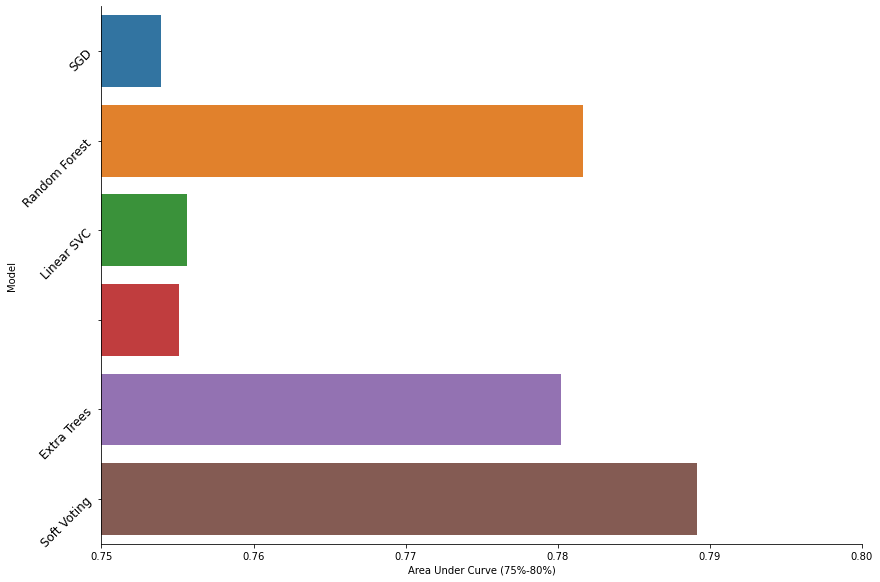

In [ ]:
auc_catplot = sns.catplot(y="Model", x="Area Under the Curve", kind="bar", height=8, aspect=1.5, orient='h',  data=auc_df)
auc_catplot.set_xlabels("Area Under Curve (75%-80%)")
auc_catplot.set_yticklabels(fontsize=12, rotation=45)
auc_catplot.set(xlim=(0.75,0.80))

In [ ]:
model_names = ["SGD", "Random Forest", "Linear SVC", "Logistic Regression", "Extra Trees", "Soft Voting"]
results_auc = [sgd_clf_accuracy, rf_clf_accuracy, lsvc_pca_accuracy, log_reg_pca_accuracy, extra_trees_clf_pca_accuracy, voting_clf_pca_soft_accuracy]
data_accuracy = {
    'Model': model_names, 
    'Accuracy': results_auc
    }
accuracy_df = pd.DataFrame(data_accuracy) 

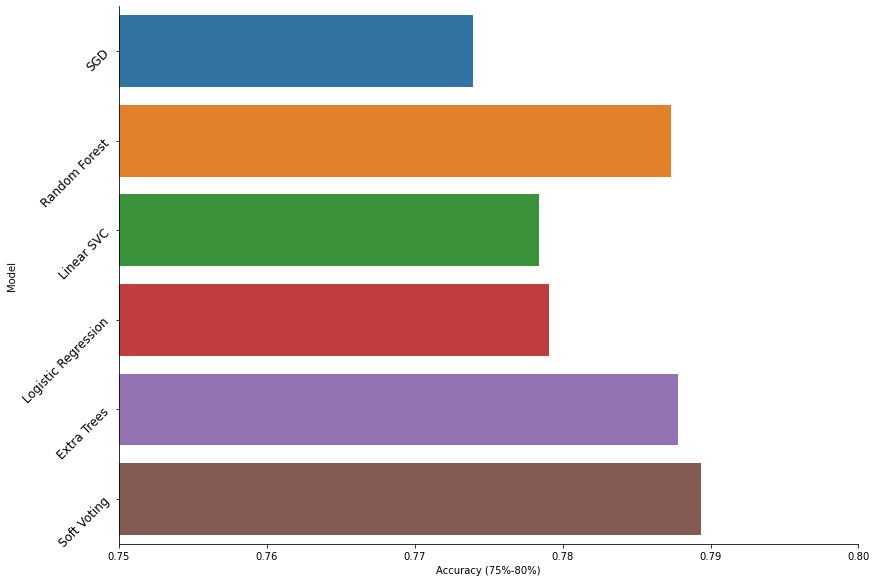

In [ ]:
accuracy_catplot = sns.catplot(y="Model", x="Accuracy", kind="bar", height=8, aspect=1.5, orient='h',  data=accuracy_df)
accuracy_catplot.set_xlabels("Accuracy (75%-80%)")
accuracy_catplot.set_yticklabels(fontsize=12, rotation=45)
accuracy_catplot.set(xlim=(0.75, 0.80))

As you can see from the in the previous plot the model with highst AUC on training data is Soft Voting Classifier 

In [ ]:
y_test_predicted = voting_clf_pca_soft.predict(x_test_prepared_pca)

## Analysis Metrics 

### Analysis of the distribution

### Confusion Matrix

Text(0.5, 24.0, 'Prediction')

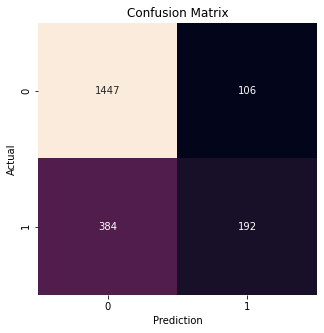

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')

### Other Metrics

In [ ]:
precision = precision_score(y_test, y_test_predicted)
recall = recall_score(y_test, y_test_predicted)
accuracy = accuracy_score(y_test, y_test_predicted)
auc = roc_auc_score(y_test, y_test_predicted)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('AUC:', auc)

Precision: 0.6442953020134228
Recall: 0.3333333333333333
Accuracy: 0.7698449976514796
AUC: 0.6325391714960292


Text(0, 0.5, 'TPR')

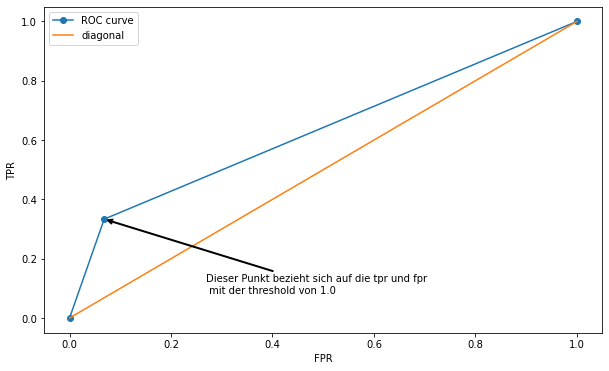

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted)

plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")

rnd_idx = 1
plt.annotate(
                'Dieser Punkt bezieht sich auf die tpr und fpr\n mit der threshold von {}'.format(np.round(thresholds[rnd_idx], 2)), 
                xy=(fpr[rnd_idx], 
                tpr[rnd_idx]), 
                xytext=(fpr[rnd_idx]+0.2, 
                tpr[rnd_idx]-0.25),
                arrowprops=dict(
                color='Black', 
                lw=2, 
                arrowstyle='->')
            )
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

### Cut Off Point

In [ ]:
cal_clf_cv = CalibratedClassifierCV(voting_clf_pca_soft)

In [ ]:
cal_clf_cv.fit(x_train_prepared_pca, y_train)

CalibratedClassifierCV(base_estimator=VotingClassifier(estimators=[('rf_clf',
                                                                    RandomForestClassifier(class_weight='balanced',
                                                                                           criterion='entropy',
                                                                                           max_features='log2',
                                                                                           n_estimators=2000,
                                                                                           n_jobs=-1,
                                                                                           random_state=42)),
                                                                   ('log_reg_pca',
                                                                    LogisticRegression(random_state=42,
                                                                         

In [ ]:
pickle.dump(cal_clf_cv, open("cal_clf_cv.sav", 'wb'))

In [ ]:
# cal_clf_cv = pickle.load(open("cal_clf_cv.sav", 'rb'))

In [ ]:
y_pred = cal_clf_cv.predict_proba(x_train_prepared_pca)

In [ ]:
y_pred_1 = np.hsplit(y_pred, [1])[1]

In [ ]:
auc = []
acc = []
cut_off = []
for i in range(0,1001, 1):
    y_t_p_p_p_c = np.where(y_pred_1 > (i/1000), 1, 0)
    auc.append(roc_auc_score(y_train, y_t_p_p_p_c))
    acc.append(accuracy_score(y_train, y_t_p_p_p_c))
    cut_off.append(i/1000)

In [ ]:
df_cut_off = pd.DataFrame([auc, acc, cut_off]).T
df_cut_off.columns = ['auc', 'acc', 'cut_off']

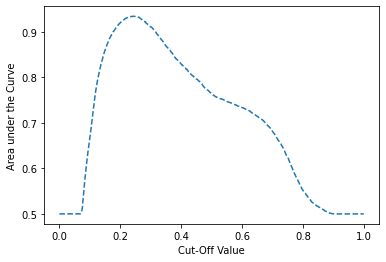

In [ ]:
fig, ax = plt.subplots()
ax.plot('cut_off', 'auc', data = df_cut_off, linestyle='dashed')
plt.xlabel("Cut-Off Value")
plt.ylabel("Area under the Curve")
plt.show()

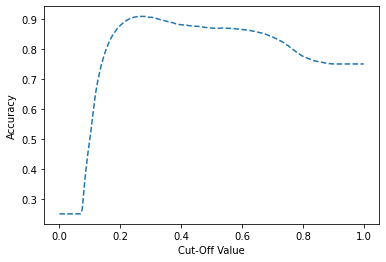

In [ ]:
fig, ax = plt.subplots()
ax.plot('cut_off', 'acc', data = df_cut_off, linestyle='dashed')
plt.xlabel("Cut-Off Value")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# best cut off for the area under curve
best_cut_off_auc = df_cut_off['cut_off'][df_cut_off['auc'].idxmax()]
best_cut_off_auc

0.246

In [ ]:
best_cut_off_acc = df_cut_off['cut_off'][df_cut_off['acc'].idxmax()]
best_cut_off_acc

0.261

In [ ]:
# best Area under Curve for the training data
df_cut_off['auc'].max()

0.9340234496074467

In [ ]:
acc[261]

0.9101680759995824

# The Result 

In [ ]:
y_pred_test = cal_clf_cv.predict_proba(x_test_prepared_pca)

In [ ]:
y_pred_test_1 = np.hsplit(y_pred_test, [1])[1]

In [ ]:
y_pred_test_1 = np.array([y_pred_test_1 > 0.215]).astype(np.int)

In [ ]:
y_pred_test_1 = y_pred_test_1.reshape(-1)

In [ ]:
roc_auc_score(y_test, y_pred_test_1)

0.7149384927022966

In [ ]:
accuracy_score(y_test, y_pred_test_1)

0.7299201503053077

Text(0, 0.5, 'TPR')

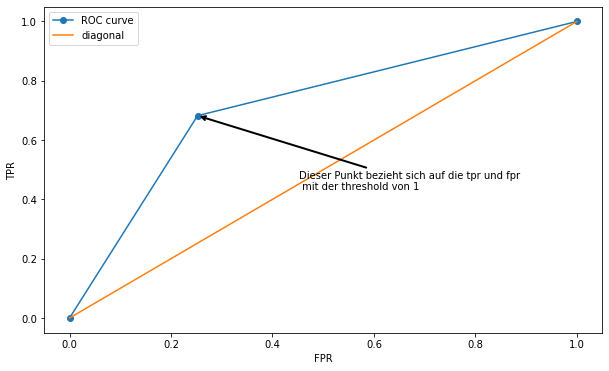

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_1)

plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")

rnd_idx = 1
plt.annotate(
                'Dieser Punkt bezieht sich auf die tpr und fpr\n mit der threshold von {}'.format(np.round(thresholds[rnd_idx], 2)), 
                xy=(fpr[rnd_idx], 
                tpr[rnd_idx]), 
                xytext=(fpr[rnd_idx]+0.2, 
                tpr[rnd_idx]-0.25),
                arrowprops=dict(
                color='Black', 
                lw=2, 
                arrowstyle='->')
            )
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0.5, 24.0, 'Prediction')

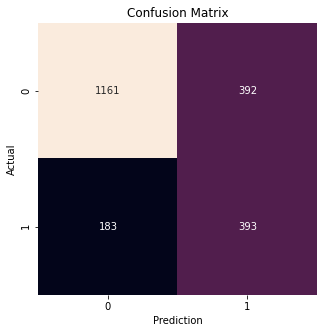

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test_1)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')